<h5 style="font-weight: bold; margin: 10px;"> Importing Libraries </h5>
<ul style="padding-top: 0; border-top: 0; margin-top:0;" >
    <li> Libraries for data analysis and visualization</li>
    <li> Libraries to ignore warnings </li>
    <li> Libraries for model data processing, model training and evaluation</li>
</ul>

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import matplotlib.ticker as ticker
# import matplotlib.ticker as plticker

# import warnings
# warnings.filterwarnings("ignore")

# from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

<h5> <strong> Importing dataset </strong> </h5>

In [101]:
train = pd.read_csv('train.csv')
validate = pd.read_csv('test_data.csv')

<h5> <strong> Dataset analysis </strong> </h5>

In [102]:
train.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,39,0,honda civic 1300,gas,std,two,hatchback,fwd,front,96.5,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,9095.0
1,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.0
2,38,0,honda accord,gas,std,two,hatchback,fwd,front,96.5,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,7895.0
3,170,2,toyota starlet,gas,NaN,two,hatchback,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116,4800,24,30,9989.0
4,198,-1,volvo 245,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515.0


In [103]:
train.shape

(164, 26)

In [104]:
train.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [105]:
train.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,164.000000,164.000000,158.000000,163.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,102.134146,0.853659,98.254430,173.080982,65.762805,53.647561,2529.262195,125.621951,3.327195,3.255030,10.030000,103.207317,5107.621951,25.481707,31.085366,16205.211384
std,58.556095,1.219695,5.568755,11.973652,2.077462,2.434402,498.054754,39.213476,0.262619,0.319759,3.855103,39.603631,487.185309,6.481188,6.790830,31643.427122
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.680000,2.190000,7.000000,48.000000,4150.000000,13.000000,16.000000,669.000000
25%,49.750000,0.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,98.000000,3.150000,3.100000,8.500000,71.500000,4800.000000,20.000000,25.000000,7765.750000
50%,105.000000,1.000000,96.750000,173.000000,65.400000,53.700000,2407.500000,115.000000,3.310000,3.290000,9.000000,94.000000,5050.000000,25.000000,30.500000,9970.000000
75%,152.250000,2.000000,100.400000,178.450000,66.500000,55.500000,2835.750000,141.000000,3.580000,3.460000,9.400000,116.000000,5500.000000,30.000000,34.000000,16123.500000
max,205.000000,3.000000,115.600000,202.600000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,360000.000000


In [106]:
train['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [107]:
empty = train.isna().sum()
empty

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          3
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           6
carlength           1
carwidth            0
carheight           0
curbweight          0
enginetype          1
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

<h5 style="font-weight: bold; margin: 10px;"> Data preprocessing </h5>
<ul style="padding-top: 0; border-top: 0; margin-top:0;" >
    <li> Data cleaning (handling missing, redundant and incosistent data) </li>
    <li> Outlier detection and removal </li>
    <li> Feature scaling (normalization/ standardization) </li>
    <li> Encoding </li>
</ul>

In [108]:
#Handling missing data

train.dropna(inplace = True)

train['CarName'].unique()
#No redundancy or incosistency

train.shape

(153, 26)

Text(0.5, 0, 'Continuous Variable')

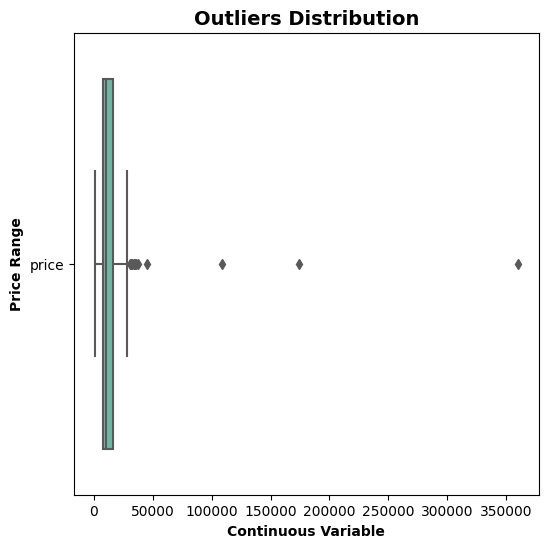

In [109]:
# Outlier detection

plt.rcParams['figure.figsize'] = [6,6]
sns.boxplot(data = train[['price']], orient = "h", palette = "Set2")

plt.title("Outliers Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')



(148, 26)

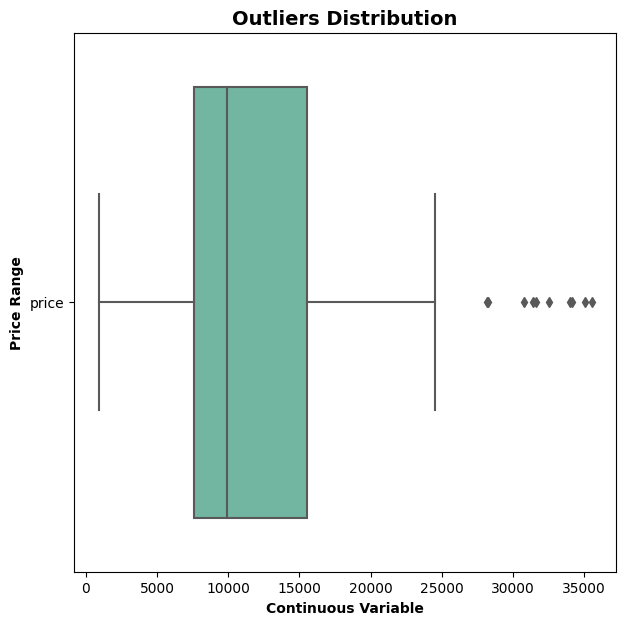

In [110]:
#Outlier removal

q = train["price"].quantile(0.97)
train = train[train["price"] < q]

plt.rcParams['figure.figsize'] = [7,7]
sns.boxplot(data = train[['price']], orient = "h", palette = "Set2")

plt.title("Outliers Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')

train.shape

# The common industry practice is to use 3 standard deviations away 
# from the mean to differentiate outlier from non-outlier.
# i.e. 0.3 % extreme cases

In [111]:
#Here comes code to find categorical and numerical
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 163
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            148 non-null    int64  
 1   symboling         148 non-null    int64  
 2   CarName           148 non-null    object 
 3   fueltype          148 non-null    object 
 4   aspiration        148 non-null    object 
 5   doornumber        148 non-null    object 
 6   carbody           148 non-null    object 
 7   drivewheel        148 non-null    object 
 8   enginelocation    148 non-null    object 
 9   wheelbase         148 non-null    float64
 10  carlength         148 non-null    float64
 11  carwidth          148 non-null    float64
 12  carheight         148 non-null    float64
 13  curbweight        148 non-null    int64  
 14  enginetype        148 non-null    object 
 15  cylindernumber    148 non-null    object 
 16  enginesize        148 non-null    int64  
 1

In [112]:
#Encoding
sig_cat_col = ['CarName','fueltype',
            'aspiration','carbody','drivewheel',
            'enginetype','cylindernumber']

le = preprocessing.LabelEncoder()
le.fit(sig_cat_col)

LabelEncoder()

In [116]:
# Feature scaling
scaler = preprocessing.StandardScaler()

sig_num_col = ['wheelbase','carlength','carwidth','curbweight','enginesize',
'boreratio','horsepower','citympg','highwaympg','price']

train[sig_num_col] = scaler.fit_transform(train[sig_num_col])
train.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,39,0,honda civic 1300,gas,std,two,hatchback,fwd,front,-0.292765,...,-0.365358,1bbl,-0.646393,3.58,9.0,-0.406933,5800,0.184282,0.232559,-0.448900
1,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,1.396094,...,0.264444,mpfi,-0.722470,3.40,8.3,1.046243,5500,-1.356607,-1.696075,1.678915
2,38,0,honda accord,gas,std,two,hatchback,fwd,front,-0.292765,...,-0.365358,1bbl,-0.646393,3.58,9.0,-0.406933,5800,0.184282,0.232559,-0.621659
4,198,-1,volvo 245,gas,std,four,wagon,rwd,front,1.123697,...,0.564349,mpfi,1.750017,3.15,9.5,0.346566,5400,-0.277985,-0.509224,0.619327
5,192,0,volkswagen rabbit,gas,std,four,sedan,fwd,front,0.415466,...,0.414396,mpfi,-0.494240,3.40,8.5,0.238923,5500,-1.048429,-1.102650,0.155757


In [114]:
#Splitting goes here 


In [115]:
#Post training and validation goes here